<a href="https://colab.research.google.com/github/MateuszPasternak/PythonForML_AGH/blob/main/DataPrepForRegression_V2_MatP_1_1ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stackoverflow_full.csv')

In [5]:
data.head()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


In [6]:
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns
from sklearn.preprocessing import (
  MinMaxScaler,
  StandardScaler,
)

Categorical Values

In [7]:
df_numerical = data.select_dtypes("number")
df_categorical = data.select_dtypes("object")

In [8]:
df_categorical["Age"] = df_categorical["Age"].replace({"<35": 1, ">35": 0})
df_numerical["Age"] = df_categorical[["Age"]]

In [9]:
df_categorical["MentalHealth"] = df_categorical["MentalHealth"].replace({"No": 0, "Yes": 1})
df_numerical["MentalHealth"] = df_categorical[["MentalHealth"]]

In [10]:
df3 = df_categorical.copy()

df_num = pd.get_dummies(df3,
                     columns = ['EdLevel'])
df_num = pd.get_dummies(df_num,
                     columns = ['Gender'])
df_num = pd.get_dummies(df_num,
                     columns = ['Accessibility'])

#display(df3)
df_num.head()

,Age,MentalHealth,MainBranch,Country,HaveWorkedWith,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,Gender_NonBinary,Gender_Woman,Accessibility_No,Accessibility_Yes
0,1,0,Dev,Sweden,C++;Python;Git;PostgreSQL,1,0,0,0,0,1,0,0,1,0
1,1,0,Dev,Spain,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,0,0,0,0,1,1,0,0,1,0
2,1,0,Dev,Germany,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,1,0,0,0,0,1,0,0,1,0
3,1,0,Dev,Canada,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,0,0,0,0,1,1,0,0,1,0
4,0,0,NotDev,Singapore,C++;Python,0,0,0,1,0,1,0,0,1,0


In [11]:
df_num.drop(['MainBranch', 'Country', 'HaveWorkedWith'], axis=1)

,Age,MentalHealth,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,Gender_NonBinary,Gender_Woman,Accessibility_No,Accessibility_Yes
0,1,0,1,0,0,0,0,1,0,0,1,0
1,1,0,0,0,0,0,1,1,0,0,1,0
2,1,0,1,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,1,1,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,0,0,0,0,1,1,0,0,1,0
73458,0,0,0,0,0,0,1,1,0,0,1,0
73459,1,0,0,0,0,0,1,1,0,0,1,0
73460,1,1,0,0,0,0,1,1,0,0,0,1


In [12]:
for i in df_num:
  df_numerical[i] = df_num[i]

In [13]:
data = df_numerical
data.head()

,Unnamed: 0,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,Age,MentalHealth,MainBranch,...,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,Gender_NonBinary,Gender_Woman,Accessibility_No,Accessibility_Yes
0,0,1,7,4,51552.0,4,0,1,0,Dev,...,1,0,0,0,0,1,0,0,1,0
1,1,1,12,5,46482.0,12,1,1,0,Dev,...,0,0,0,0,1,1,0,0,1,0
2,2,1,15,6,77290.0,7,0,1,0,Dev,...,1,0,0,0,0,1,0,0,1,0
3,3,1,9,6,46135.0,13,0,1,0,Dev,...,0,0,0,0,1,1,0,0,1,0
4,4,0,40,30,160932.0,2,0,0,0,NotDev,...,0,0,0,1,0,1,0,0,1,0


Data split (testing, training)

In [14]:
data = data.dropna()

In [15]:
data = data.drop_duplicates()

In [16]:
from sklearn.model_selection import train_test_split

#Unnamed: 0 	Age 	Accessibility 	EdLevel 	Employment 	Gender 	MentalHealth 	MainBranch 	YearsCode
#YearsCodePro 	Country 	PreviousSalary 	HaveWorkedWith 	ComputerSkills 	Employed

data = data.drop(['Unnamed: 0', 'Employment', 'Country', 'HaveWorkedWith',
               'MainBranch','ComputerSkills', 'Employed','Accessibility_No'], axis = 1)

y = data['MentalHealth']

Data_train, Data_test = train_test_split(data, test_size=0.2, random_state=1)
Data_train, Data_val = train_test_split(Data_train, test_size=0.25, random_state=1)

dataX = Data_train[Data_train['YearsCodePro'] <= Data_train['YearsCode']]

Data operation on train set

Equal people's with mental health problems to healthy 1:1

In [17]:
dataXmeq = dataX[dataX['MentalHealth'] == 1]
dataXneq = dataX[dataX['MentalHealth'] == 0]

dataXeq = dataXneq[:len(dataXmeq)]

In [18]:
dataXeq = dataXeq.append(dataXmeq)

<ipython-input-18-2238cb1364c0>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataXeq = dataXeq.append(dataXmeq)


Normalizing data

In [34]:
#X_train = dataX.drop(['MentalHealth'], axis = 1)
#y_train = dataX['MentalHealth']

X_train = dataXeq.drop(['MentalHealth'], axis = 1)
y_train = dataXeq['MentalHealth']

X_test = Data_test.drop(['MentalHealth'], axis = 1)
y_test = Data_test['MentalHealth']

X_val = Data_val.drop(['MentalHealth'], axis = 1)
y_val = Data_val['MentalHealth']

**Less features**

In [20]:
X_train = dataX.drop(['MentalHealth', 'YearsCodePro',
                       'YearsCode', 'PreviousSalary',
                       'Age'], axis = 1) #'YearsCodePro',
y_train = dataX['MentalHealth']

X_test = Data_test.drop(['MentalHealth', 'YearsCodePro',
                          'YearsCode', 'PreviousSalary',
                          'Age'], axis = 1)
y_test = Data_test['MentalHealth']

X_val = Data_val.drop(['MentalHealth', 'YearsCodePro',
                        'YearsCode', 'PreviousSalary',
                        'Age'], axis = 1)
y_val = Data_val['MentalHealth']

minmax_scaler = MinMaxScaler().set_output(transform="pandas")
dataTrain_normalized = minmax_scaler.fit_transform(XX_train)

NameError: ignored

In [36]:
minmax_scaler = MinMaxScaler().set_output(transform="pandas")
dataTrain_normalized_2 = minmax_scaler.fit_transform(X_train)
dataTrain_normalized_old = minmax_scaler.fit_transform(Data_train)

<Axes: >

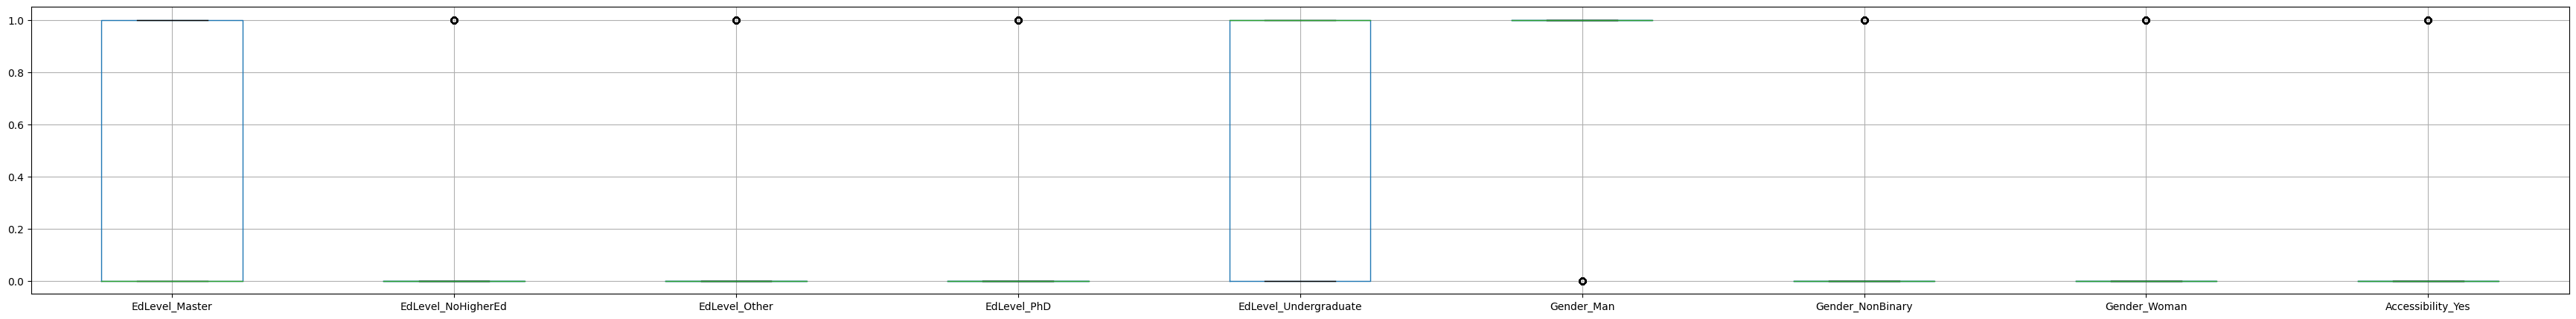

In [27]:
plt.figure(figsize=(44, 5))
dataTrain_normalized_2.boxplot()

In [28]:
sns.set_theme()

plt.figure(figsize=(24, 15))
sns.scatterplot(dataTrain_normalized, x='PreviousSalary', y='YearsCodePro')
plt.figure(figsize=(24, 15))
sns.scatterplot(dataTrain_normalized, x='PreviousSalary', y='YearsCode')

plt.figure(figsize=(24, 15))
sns.scatterplot(dataTrain_normalized_old, x='YearsCode', y='YearsCodePro')
plt.figure(figsize=(24, 15))
sns.scatterplot(dataTrain_normalized, x='YearsCode', y='YearsCodePro')

NameError: ignored

<Figure size 2400x1500 with 0 Axes>

in report describe why have you cut data above line above

# **Classification Task**

Imports

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

Define classifiers

In [ ]:
#clf = svm.SVC(kernel='rbf')
#clf = MLPClassifier()
#clf = KNeighborsClassifier(n_neighbors=5)
#clf = tree.DecisionTreeClassifier(max_depth=3)

**SVM clasiffiers**

SVM classifier kernel linear

In [ ]:
clf = svm.SVC(kernel='linear', random_state=1)
clf.fit(dataTrain_normalized, y_train)
y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_svc_rbf = accuracy_score(y_train, y_pred_train)
acc_val_svc_rbf = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_svc_rbf}, val: {acc_val_svc_rbf}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

acc score, train: 0.7744786062590142, val: 0.7737738419618528
tn train: 33830, fp train: 0, fn train: 9851, tp train: 0
tn val: 11359, fp val: 0, fn val: 3321, tp val: 0


In [ ]:
clf = svm.SVC(kernel='linear', random_state=1)
clf.fit(dataTrain_normalized, y_train)
y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_svc_rbf = accuracy_score(y_train, y_pred_train)
acc_val_svc_rbf = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_svc_rbf}, val: {acc_val_svc_rbf}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

acc score, train: 0.7744786062590142, val: 0.3119891008174387
tn train: 33830, fp train: 0, fn train: 9851, tp train: 0
tn val: 1708, fp val: 9651, fn val: 449, tp val: 2872


SVM classifier kernel poly

In [37]:
clf = svm.SVC(kernel='poly', random_state=1)
clf.fit(dataTrain_normalized_2, y_train)
y_pred_train = clf.predict(dataTrain_normalized_2)
y_pred = clf.predict(X_val)

acc_train_svc_rbf = accuracy_score(y_train, y_pred_train)
acc_val_svc_rbf = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_svc_rbf}, val: {acc_val_svc_rbf}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
FNR = fn/(fn+tp);
TPR = tp/(tp+fn);

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp},\n FNR: {FNR}, TPR: {TPR}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

acc score, train: 0.5979088417419551, val: 0.773433242506812
tn train: 6216, fp train: 3635, fn train: 4287, tp train: 5564,
 FNR: 0.4351842452542889, TPR: 0.5648157547457111
tn val: 11353, fp val: 6, fn val: 3320, tp val: 1


In [ ]:
clf = svm.SVC(kernel='poly', degree=2, random_state=1)
clf.fit(dataTrain_normalized, y_train)
y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_svc_rbf = accuracy_score(y_train, y_pred_train)
acc_val_svc_rbf = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_svc_rbf}, val: {acc_val_svc_rbf}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

acc score, train: 0.7761727066688033, val: 0.7763623978201635
tn train: 33695, fp train: 135, fn train: 9642, tp train: 209
tn val: 11317, fp val: 42, fn val: 3241, tp val: 80


**MLP Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(15, 10), solver='lbfgs', max_iter=100000, random_state=1, early_stopping=True)
clf.fit(dataTrain_normalized, y_train)
y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_mlp = accuracy_score(y_train, y_pred_train)
acc_val_mlp = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_mlp}, val: {acc_val_mlp}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
FNR = fn/(fn+tp);
TPR = tp/(tp+fn);

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp},\n FNR: {FNR}, TPR: {TPR}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
FNR = fn/(fn+tp);
TPR = tp/(tp+fn);
print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp},\n FNR: {FNR}, TPR: {TPR}")

acc score, train: 0.7762413864151462, val: 0.776566757493188
tn train: 33516, fp train: 314, fn train: 9460, tp train: 391,
 FNR: 0.9603085981118669, TPR: 0.039691401888133186
tn val: 11252, fp val: 107, fn val: 3173, tp val: 148,
 FNR: 0.9554351099066546, TPR: 0.044564890093345376


In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
# in case of classification
scores = cross_val_score(clf, dataTrain_normalized, y_train, cv=5, scoring='accuracy')
scores = cross_validate(clf, dataTrain_normalized, y_train, cv=5,
                        scoring=['accuracy','f1', 'rand_score','recall'])

In [ ]:
print(scores['test_accuracy'])
print(scores['test_f1'])
print(scores['test_recall'])
print(scores['test_rand_score'])
#print(scores['fit_time'])
#print(scores['score_time'])

[0.77520888 0.77495421 0.77655678 0.7760989  0.77529762]
[0.0727101  0.07351555 0.0496592  0.07909605 0.05579606]
[0.03906646 0.03959391 0.02588832 0.04263959 0.02944162]
[0.65143996 0.65115971 0.65292757 0.65242142 0.65153767]


In [42]:
from sklearn.model_selection import GridSearchCV

clf = MLPClassifier()
parameters = {'hidden_layer_sizes':[(5,10),(15,30),(10,10,10),(15,10),(20,30,15)],
              'solver':('lbfgs', 'adam', 'sgd'),
              'early_stopping':[True,False]}
grid_search = GridSearchCV(clf, parameters, cv=5, scoring='recall')
grid_search.fit(dataTrain_normalized_2, y_train)
print(grid_search.best_params_) # to get the best parameters
print(grid_search.best_estimator_) # to get the best estimator
print(grid_search.cv_results_) # to get all results

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

{'early_stopping': False, 'hidden_layer_sizes': (15, 30), 'solver': 'adam'}
MLPClassifier(hidden_layer_sizes=(15, 30))
{'mean_fit_time': array([ 4.20441189,  1.63118596,  2.38935003,  7.34690351,  2.21650019,
        4.84765444,  6.97655115,  2.54645104,  7.90379419,  4.19905758,
        2.63651433,  2.93081021, 10.17985406,  2.46971259,  5.69915276,
        3.51943932,  2.52745223,  4.31663432,  7.27800546,  4.08514175,
        6.28458767,  5.65463419,  4.97299523,  7.51543598,  5.12550082,
        3.63763719,  4.59075613, 10.41539235,  6.29426246,  6.95759034]), 'std_fit_time': array([1.29394172, 0.6424501 , 0.881275  , 1.51863169, 0.70552996,
       2.18838523, 2.27345752, 1.2400489 , 3.29710886, 1.24731772,
       1.41353551, 0.88784785, 1.83005176, 1.57904755, 0.99824371,
       1.30715167, 0.56581683, 2.75988536, 1.47204883, 1.1797634 ,
       1.5718632 , 1.13983351, 1.06339152, 1.62215832, 1.57617781,
       1.05853316, 1.59211771, 1.375383  , 0.85905591, 1.88251521]), 'mean_sco

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200, random_state=0)
MLP = MLPClassifier('hidden_layer_sizes':(5, 10), 'solver':'adam' ,'early_stopping':False)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])

clf = RandomizedSearchCV(MLP, distributions, random_state=0)

search = clf.fit(dataTrain_normalized, y_train, scoring='')

print(search.best_params_) # to get the best parameters
print(search.best_estimator_) # to get the best estimator
print(search.cv_results_) # to get all results

SyntaxError: ignored

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), solver='lbfgs', max_iter=5000, random_state=1, early_stopping=True)
x_frames = [dataTrain_normalized, X_val]
x_11 = pd.concat(x_frames)
y_frames = [y_train, y_val]
y_11 = pd.concat(y_frames)
clf.fit(x_11, y_11)

y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_mlp = accuracy_score(y_train, y_pred_train)
acc_val_mlp = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_mlp}, val: {acc_val_mlp}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

acc score, train: 0.7762413864151462, val: 0.776566757493188
tn train: 33516, fp train: 314, fn train: 9460, tp train: 391
tn val: 11252, fp val: 107, fn val: 3173, tp val: 148


In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(10, 30, 20), solver='lbfgs', max_iter=5000, random_state=1, early_stopping=True)
x_frames = [dataTrain_normalized, X_val]
x_11 = pd.concat(x_frames)
y_frames = [y_train, y_val]
y_11 = pd.concat(y_frames)
clf.fit(x_11, y_11)

y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_mlp = accuracy_score(y_train, y_pred_train)
acc_val_mlp = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_mlp}, val: {acc_val_mlp}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

acc score, train: 0.2255213937409858, val: 0.22622615803814713
tn train: 0, fp train: 33830, fn train: 0, tp train: 9851
tn val: 0, fp val: 11359, fn val: 0, tp val: 3321


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
np.count_nonzero(y == 1)

16504

In [ ]:
np.count_nonzero(y_train == 1)

9851

In [ ]:
np.count_nonzero(y_test == 1)

3247

In [ ]:
np.count_nonzero(y_val == 1)

3321

In [ ]:
np.count_nonzero(y_pred_train == 1)

43681

In [ ]:
np.count_nonzero(y_pred == 1)

14680

<Axes: >

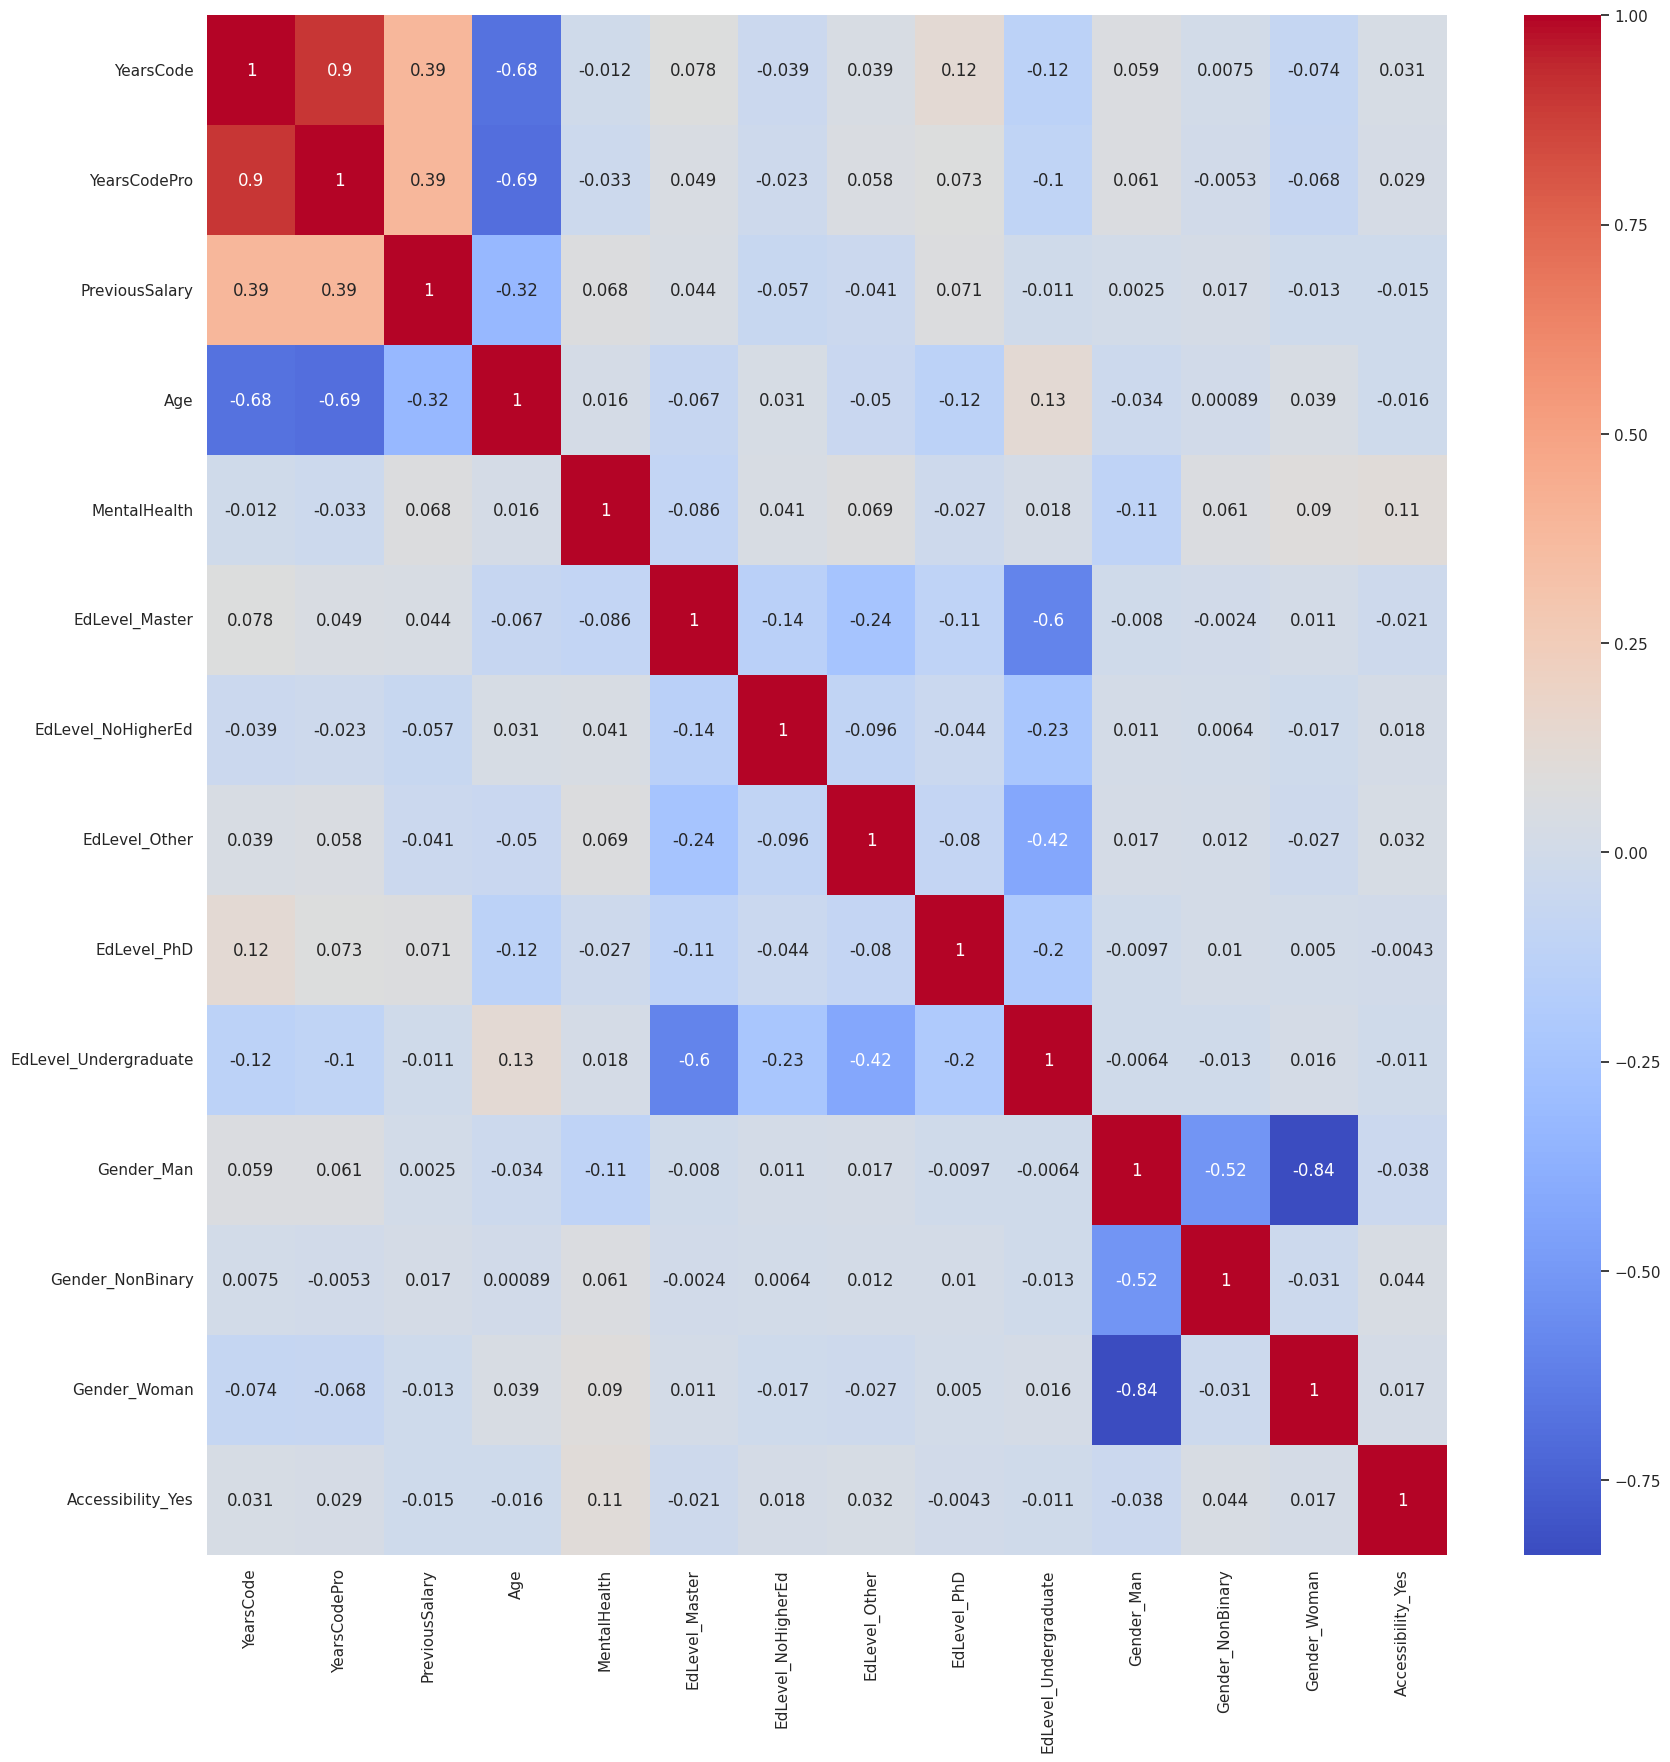

In [ ]:
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns
# Apply the default theme
sns.set_theme()
plt.figure(figsize=(20, 20))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(10, 30, 20), solver='lbfgs', max_iter=5000, random_state=1, early_stopping=True)
x_frames = [dataTrain_normalized_2, XX_val]
x_11 = pd.concat(x_frames)
y_frames = [yy_train, yy_val]
y_11 = pd.concat(y_frames)
clf.fit(x_11, y_11)

y_pred_train = clf.predict(dataTrain_normalized_2)
y_pred = clf.predict(XX_val)

acc_train_mlp = accuracy_score(y_train, y_pred_train)
acc_val_mlp = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_mlp}, val: {acc_val_mlp}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

acc score, train: 0.7774089421029738, val: 0.781267029972752
tn train: 33500, fp train: 330, fn train: 9393, tp train: 458
tn val: 11187, fp val: 172, fn val: 3039, tp val: 282
